In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #그래프용 seaborn 라이브러리
import matplotlib.pyplot as plt #그래프 표시
import re
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

In [4]:
import torch
import torchtext

print("PyTorch Version:", torch.__version__)
print("Torchtext Version:", torchtext.__version__)

PyTorch Version: 2.0.1
Torchtext Version: 0.15.2


In [ ]:
# 기존의 torch 및 torchtext 제거
!pip uninstall -y torch torchvision torchaudio torchtext

# PyTorch 2.0.1 및 Torchtext 0.15.2 설치
!pip install torch==2.0.1 torchvision torchaudio torchtext==0.15.2

1. 데이터셋 불러오기

In [1]:
import os
os.chdir('/Users/jinee/Downloads')

# 데이터 로드
data = pd.read_csv('netflix_reviews.csv')

2. 데이터 전처리

In [5]:
# 데이터 전처리 함수
def preprocess_text(content):
    if isinstance(content, float):
        return ''
    content = content.lower()
    content = re.sub(r'[^/w/s]', '', content)
    content = re.sub(r'\d+', '', content)
    content = content.strip()
    return content

In [ ]:
3. feature 분석

/var/folders/6r/4f9h9b394358ljn61rk9pqlr0000gn/T/ipykernel_22140/3409783522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['score'].value_counts().index, y=data['score'].value_counts().values, palette=palette)


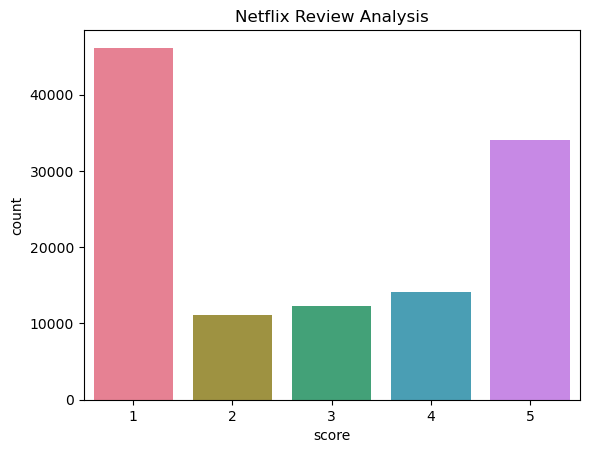

In [13]:
# 시각화
palette = sns.color_palette('husl', 5)
sns.barplot(x=data['score'].value_counts().index, y=data['score'].value_counts().values, palette=palette)
plt.xlabel('score')
plt.ylabel('count')
plt.title('Netflix Review Analysis')
plt.show()

In [7]:
# Dataset 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, content, score, preprocess_text):
        self.content = content
        self.score = score
        self.preprocess_text = preprocess_text

    def __len__(self):
        return len(self.content)

    def __getitem__(self, idx):
        content = self.preprocess_text(self.content.iloc[idx])
        score = self.score.iloc[idx]
        return content, score

In [8]:
# 데이터 분할
train_content, test_content, train_score, test_score = train_test_split(
    data['content'], data['score'], test_size=0.2, random_state=42)

# 배치 크기 설정
batch_size = 64

# Dataset 객체 생성
train_dataset = ReviewDataset(train_content, train_score, preprocess_text)
test_dataset = ReviewDataset(test_content, test_score, preprocess_text)


In [10]:
def content_text(content):
    for text in content:
        # 만약 숫자형(float)이거나 NaN인 경우 빈 문자열로 처리
        if isinstance(text, float):
            text = ""
        yield text.split()

from torchtext.vocab import build_vocab_from_iterator
vocab = build_vocab_from_iterator(content_text(data['content']), specials=['<unk>'])
vocab.set_default_index(vocab['<unk>'])


In [11]:
# LSTM 모델 클래스 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        out = self.fc(lstm_out[:, -1, :])
        return out

NameError: name 'ratings' is not defined